# Monotonic Quartic For Saturation

## Preliminary: Nonnegative Polynomials

A polynomial $p(x)$ is nonnegative on an interval $[a,b]$, if it can be expressed as:
\begin{equation}
\begin{aligned}
p(x) &= s(x) + (x-a)(b-x)t(x), \quad \text{for even degree} \\
p(x) &= (x-a)s(x) + (b-x)t(x), \quad \text{for odd degree}
\end{aligned}
\end{equation}
where $s(x),t(x)$ are sums-of-squares. A polynomial $s(x)$ is a sum-of-squares, iff it can be written as:
$s(x) = \sum_k q_k^2(x)$, where the $q_k(x)$ are polynomials.

## A Monotonic Quartic for Saturation

We want to construct a function $p(x)$ that lends itself for use as saturator. We are going to define it only for positive inputs and will symmetrize it around the origin for negative inputs. A general 4th order polynomial $p(x)$ has the form:
$$
p(x) = p_0 + p_1 x + p_2 x^2 + p_3 x^3 + p_4 x^4
$$
For continuity, we require it to pass through the origin: $p(0)=0$. Furthermore, we want to be able to specify its slope $k$ at the origin: $p'(0)=k$. These conditions determine $p_0=0, p_1=k$ directly, so our polynomial is:
$$
p(x) = k x + p_2 x^2 + p_3 x^3 + p_4 x^4
$$
We want the polynomial to have $p(1)=1, p'(1)=0$. Then we may use it in the following way for saturation: $f(x)=p(x)$, if $x<1$, $f(x)=1$, otherwise. At the moment, we have 4 contsraints, which would normally call for a 3rd order polynomial. However, we additionally require monotonicity on the interval $[0,1]$ and that's why we need another degree of freedom. Being monotonic on an interval means that the derivative must be nonnegative on that interval. That's why we construct the derivative our polynomial from the odd degree case of the nonnegative polynomial. For this, we define:
\begin{equation}
\begin{aligned}
s(x) &= (a(x))^2 = (a_0 + a_1 x)^2 = a_0^2 + 2 a_0 a_1 x + a_1^2 \\
t(x) &= (b(x))^2 = (b_0 + b_1 x)^2 = b_0^2 + 2 b_0 b_1 x + b_1^2
\end{aligned}
\end{equation}
Inserting the limits $[a,b] = [0,1]$ gives for our derivative:
$$
p'(x) = (x-0) s(x) + (1-x) t(x) = x(s(x)-t(x)) + t(x)
$$
Inserting $s(x), t(x)$ and simplifying gives:
$$
p'(x) = b_0^2 + (a_0^2-b_0^2+2 b_0 b_1)x + (2 a_0 a_1 - 2 b_0 b_1 + b_1^2)x^2 + (a_1^2-b_1^2)x^3
$$
from which we construct our actual $p(x)$ by finding the antiderivative:
$$
p(x) = b_0^2 x + \frac{a_0^2-b_0^2+2 b_0 b_1}{2} x^2 + \frac{2 a_0 a_1 - 2 b_0 b_1 + b_1^2}{3} x^3 + \frac{a_1^2-b_1^2}{4} x^4
$$
The integration constant was set to zero, since we already know $p_0 = 0$. We also already know $p_1 = b_0^2 = k$, so we have $b_0 = \sqrt{k}$. Putting in our additional two constraints $p(1)=1, p'(1)=0$ gives:
$$
\begin{aligned}
1 &= k + \frac{a_0^2-k+2 b_0 b_1}{2} + \frac{2 a_0 a_1 - 2 b_0 b_1 + b_1^2}{3} + \frac{a_1^2-b_1^2}{4} \\
0 &= k +       a_0^2-k+2 b_0 b_1       +     2 a_0 a_1 - 2 b_0 b_1 + b_1^2     +       a_1^2-b_1^2
\end{aligned}
$$
where the 2nd line can be simplified to $(a_0 + a_1)^2 = 0$ which implies $a_0 = -a_1$. Putting this into the 1st line gives:
$$
1 = k + \frac{a_0^2-k+2 b_0 b_1}{2} + \frac{-2 a_0^2 - 2 b_0 b_1 + b_1^2}{3} + \frac{a_0^2-b_1^2}{4}
$$
Solving this equation for $b_1$ gives:
$$
b_1 = -2 b_0 \pm \sqrt{12 - a_0^2 - 2k}
$$
This leaves us one free parameter $a_0^2$ - choosing a value for $a_0^2$ allows us to calculate everything else we need for our polynomial:
$$
b_0 = \sqrt{k}, b_1 = -2 b_0 \pm \sqrt{12 - a_0^2 - 2k}, p_2 = \frac{a_0^2-k+2 b_0 b_1}{2}, p_3 = \frac{-2 a_0^2 - 2 b_0 b_1 + b_1^2}{3}, p_4 = \frac{a_0^2-b_1^2}{4}
$$
We are still left with the question, how to choose $a_0^2$. In order for the square root to have a real result, we see that we need to have $k \leq 6 - a_0^2/2$. This means, choosing $a_0^2 = 0$ gives us the greatest range for possible slopes at the origin $k$ - in this case, the slope can be chosen up to 6. Another interesting case is to set $p_2 = 0$. We get an additional equation $0 = a_0^2-k+2 b_0 b_1$ to solve along with the one which we formerly solved for $b_1$ - i.e. we solve now the 2 equstions for $b_1, a_0^2$ simultaneously. We get:
$$
c = \sqrt{-6 k (k-2)}, a_0^2 = 3k \pm 2c, b_1 = (-k \pm c)/b_0
$$
The maximum allowed value for $k$ reduces to 2. Let's write Python functions to compute the polynomial coefficients for the general case and both special cases and test them. We use $k=1.8$, and $a_0^2=1$ for the general case:

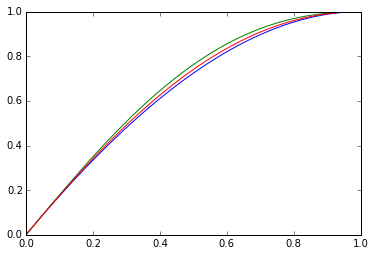

In [32]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

def coeffs(k, a0sq):     # computes coeffcients for monotonic quartic polynomial
    b0   = sqrt(k)
    b1   = -2*b0 + sqrt(12-a0sq-2*k) # 2nd solution: ... -sqrt(...) gives turning points
    p    = zeros(5)
    p[4] = 0
    p[3] = k
    p[2] = (a0sq-k+2*b0*b1)/2
    p[1] = (-2*a0sq-2*b0*b1+b1*b1)/3
    p[0] = (a0sq-b1*b1)/4
    return p
    
def coeffsNoA0(k):
    b0   = sqrt(k)
    b1   = -2*b0 + sqrt(12-2*k)
    p    = zeros(5)
    p[4] = 0
    p[3] = k
    p[2] = (-k+2*b0*b1)/2
    p[1] = (-2*b0*b1+b1*b1)/3
    p[0] = (-b1*b1)/4
    return p
    
def coeffsNoP2(k):
    b0   = sqrt(k)
    c    = sqrt(-6*k*(k-2))
    a0sq = 3*k + 2*c                    # or: a0sq = 3*k - 2*c
    b1   = (-k - c)/b0                  #     b1   = (-k + c)/b0
    #b1   = -2*b0 + sqrt(12-a0sq-2*k)   # with + sqrt, it rises more quickly
    p    = zeros(5)
    p[4] = 0
    p[3] = k
    p[2] = (a0sq-k+2*b0*b1)/2  # should be 0
    p[1] = (-2*a0sq-2*b0*b1+b1*b1)/3
    p[0] = (a0sq-b1*b1)/4
    return p

N = 201
x = linspace(0.0, 1.0, N)     # x-axis values
k = 1.8

p = coeffsNoA0(k)
y = polyval(p, x)
plot(x, y)

p = coeffsNoP2(k)
y = polyval(p, x)
plot(x, y)

p = coeffs(k, 1)
y = polyval(p, x)
plot(x, y)

## Putting the Quartic to Use

We demonstrate the use of the function as saturation function with adjustable saturation level $k$. At k=1.8, the function reaches its saturating value.

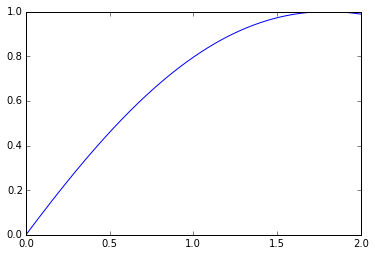

In [2]:
x = linspace(0.0, 2.0, N)
y = polyval(p, x/k)
plot(x, y)

By dividing the input x to the polynomial by k, we achieve unit slope at the origin and move the saturating value from 1 to k.